A. setup And Load your CSV

In [6]:
from google.colab import files
files.download("/content/network_logs.csv")
import pandas as pd

df = pd.read_csv("network_logs.csv")
df.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,src_ip,dest_ip,protocol,bytes,threat_label,message
0,2025-01-04 20:52:29,192.168.1.230,10.0.0.167,HTTP,4182,benign,Normal network activity
1,2025-01-02 13:45:55,192.168.1.83,10.0.0.28,HTTP,90,benign,Normal network activity
2,2025-01-06 19:04:09,192.168.1.7,10.0.0.26,HTTPS,5795,benign,Normal network activity
3,2025-01-12 19:17:40,192.168.1.127,10.0.0.182,TCP,9233,benign,Normal network activity
4,2025-01-10 10:08:00,192.168.1.46,10.0.0.170,HTTPS,8111,benign,Normal network activity


B. Read Dataset into SQLite inside Colab

In [ ]:
import sqlite3

# Load dataset into SQLite
conn = sqlite3.connect("/content/cyber.db")
df_sql = df_clean.copy()
df_sql.to_sql("network_logs", conn, if_exists="replace", index=False)

# Create entity relations table
entity = df_sql[["src_ip","dest_ip"]].dropna().rename(columns={"src_ip":"src","dest_ip":"dst"})
entity["relation_type"] = "connection"
entity.to_sql("entity_relations", conn, if_exists="replace", index=False)

print("Tables:", pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn))


Tables:                name
0      network_logs
1  entity_relations


Prompt 1: Select top 20 rows from network_logs.

In [ ]:
pd.read_sql("""SELECT * FROM network_logs LIMIT 20;""", conn)


,timestamp,src_ip,dest_ip,protocol,bytes,threat_label,message
0,2025-01-01 02:01:32,192.168.1.49,10.0.0.177,HTTPS,2425,benign,Normal network activity
1,2025-01-11 19:21:12,192.168.1.54,10.0.0.188,HTTPS,1917,benign,Normal network activity
2,2025-01-14 23:10:41,192.168.1.218,10.0.0.98,HTTPS,9951,benign,Normal network activity
3,2025-01-10 23:15:08,192.168.1.182,10.0.0.83,ICMP,8227,benign,Normal network activity
4,2025-01-25 05:45:17,192.168.1.6,10.0.0.201,TCP,6044,benign,Normal network activity
5,2025-01-11 10:20:02,192.168.1.56,10.0.0.239,ICMP,3046,benign,Normal network activity
6,2025-01-25 13:24:09,192.168.1.8,10.0.0.135,HTTPS,114,benign,Normal network activity
7,2025-01-22 01:40:24,192.168.1.165,10.0.0.145,ICMP,2170,benign,Normal network activity
8,2025-01-16 12:52:15,192.168.1.107,10.0.0.202,ICMP,1663,benign,Normal network activity
9,2025-01-07 14:02:54,192.168.1.191,10.0.0.113,UDP,1973,benign,Normal network activity


prompt 2: Count total number of rows (records).

In [ ]:


pd.read_sql("""SELECT COUNT(*) AS total_rows FROM network_logs;""", conn)


,total_rows
0,5000


prompt 3: Count total unique source IPs and destination IPs.

In [ ]:


pd.read_sql("""SELECT COUNT(DISTINCT src_ip) AS unique_src, COUNT(DISTINCT dest_ip) AS unique_dst FROM network_logs;""", conn)


,unique_src,unique_dst
0,254,254


Prompt 4: Find top 10 most frequent source IPs.

In [ ]:


pd.read_sql("""SELECT src_ip, COUNT(*) AS cnt FROM network_logs GROUP BY src_ip ORDER BY cnt DESC LIMIT 10;""", conn)


,src_ip,cnt
0,192.168.1.179,33
1,192.168.1.171,31
2,192.168.1.253,30
3,192.168.1.9,29
4,192.168.1.6,29
5,192.168.1.62,28
6,192.168.1.252,28
7,192.168.1.244,28
8,192.168.1.227,28
9,192.168.1.212,28


Prompt 5: Find top 10 most frequent Destination IPs

In [ ]:


pd.read_sql("""SELECT dest_ip, COUNT(*) AS cnt FROM network_logs GROUP BY dest_ip ORDER BY cnt DESC LIMIT 10;""", conn)


,dest_ip,cnt
0,10.0.0.136,39
1,10.0.0.144,37
2,10.0.0.199,32
3,10.0.0.134,32
4,10.0.0.116,31
5,10.0.0.74,30
6,10.0.0.135,30
7,10.0.0.130,30
8,10.0.0.98,29
9,10.0.0.105,29


Prompt 6: Count total number of threats by threat_label.

In [ ]:


pd.read_sql("""SELECT threat_label, COUNT(*) AS n FROM network_logs GROUP BY threat_label ORDER BY n DESC;""", conn)


,threat_label,n
0,benign,4021
1,malicious,979


Prompt 7: Count number of normal vs malicious traffic.

In [ ]:


pd.read_sql("""SELECT SUM(CASE WHEN threat_label IN ('malicious',1) THEN 1 ELSE 0 END) AS malicious, SUM(CASE WHEN threat_label IN ('benign',0) THEN 1 ELSE 0 END) AS benign FROM network_logs;""", conn)


,malicious,benign
0,979,4021


Prompt 8: Find the average packet size (bytes) per protocol.

In [ ]:


pd.read_sql("""SELECT protocol, AVG(bytes) AS avg_bytes FROM network_logs GROUP BY protocol ORDER BY avg_bytes DESC;""", conn)


,protocol,avg_bytes
0,HTTPS,5034.846968
1,ICMP,5027.942268
2,UDP,4935.745342
3,TCP,4892.315736
4,HTTP,4840.244231


Prompt 9: Find maximum and minimum packet size observed.

In [ ]:


pd.read_sql("""SELECT MIN(bytes) AS min_bytes, MAX(bytes) AS max_bytes FROM network_logs;""", conn)


,min_bytes,max_bytes
0,44,9999


Prompt 10: Group traffic by protocol and count number of threats.

In [ ]:


pd.read_sql("""SELECT protocol, SUM(CASE WHEN threat_label IN ('malicious',1) THEN 1 ELSE 0 END) AS threats FROM network_logs GROUP BY protocol ORDER BY threats DESC;""", conn)


,protocol,threats
0,HTTP,225
1,TCP,197
2,HTTPS,192
3,UDP,186
4,ICMP,179


Prompt 11: Find top 5 IPs with the highest malicious activity.

In [ ]:


pd.read_sql("""SELECT src_ip, COUNT(*) AS mal_count FROM network_logs WHERE threat_label IN ('malicious',1) GROUP BY src_ip ORDER BY mal_count DESC LIMIT 5;""", conn)


,src_ip,mal_count
0,192.168.1.202,11
1,192.168.1.99,10
2,192.168.1.84,10
3,192.168.1.42,10
4,192.168.1.97,9


Prompt 12: Get all logs where protocol = 'TCP' and threat_label = 'malicious'

In [ ]:


pd.read_sql("""SELECT * FROM network_logs WHERE protocol='TCP' AND threat_label IN ('malicious',1) LIMIT 100;""", conn)


,timestamp,src_ip,dest_ip,protocol,bytes,threat_label,message
0,2025-01-26 21:30:44,192.168.1.181,10.0.0.37,TCP,9970,malicious,Malicious payload detected
1,2025-01-25 08:17:54,192.168.1.128,10.0.0.1,TCP,3757,malicious,Malicious payload detected
2,2025-01-19 08:49:52,192.168.1.113,10.0.0.236,TCP,78,malicious,Suspicious traffic observed
3,2025-01-06 08:50:28,192.168.1.214,10.0.0.2,TCP,3198,malicious,Detected possible attack
4,2025-01-01 23:12:01,192.168.1.26,10.0.0.199,TCP,4652,malicious,Potential phishing attempt
...,...,...,...,...,...,...,...
95,2025-01-17 23:07:27,192.168.1.120,10.0.0.66,TCP,6003,malicious,Detected possible attack
96,2025-01-09 08:12:11,192.168.1.174,10.0.0.10,TCP,3443,malicious,Malicious payload detected
97,2025-01-13 04:05:23,192.168.1.198,10.0.0.5,TCP,6970,malicious,Detected possible attack
98,2025-01-02 03:30:54,192.168.1.7,10.0.0.245,TCP,7160,malicious,Potential phishing attempt


Prompt 13: Count malicious traffic per hour (group by timestamp hour).

In [ ]:


pd.read_sql("""SELECT strftime('%Y-%m-%d %H:00:00', timestamp) AS hour_slot, COUNT(*) AS mal_count FROM network_logs WHERE threat_label IN ('malicious',1) GROUP BY hour_slot ORDER BY hour_slot;""", conn)


,hour_slot,mal_count
0,2025-01-01 00:00:00,2
1,2025-01-01 02:00:00,1
2,2025-01-01 03:00:00,2
3,2025-01-01 04:00:00,1
4,2025-01-01 06:00:00,2
...,...,...
526,2025-01-30 19:00:00,1
527,2025-01-30 20:00:00,2
528,2025-01-30 21:00:00,2
529,2025-01-30 22:00:00,2


Prompt 14: Detect unusual spikes: find hours where malicious traffic > average malicious traffic.

In [ ]:


pd.read_sql("""WITH hourly AS (SELECT strftime('%Y-%m-%d %H:00:00', timestamp) AS hour_slot, COUNT(*) AS mal_count FROM network_logs WHERE threat_label IN ('malicious',1) GROUP BY hour_slot ), avgval AS (SELECT AVG(mal_count) AS avg_mal FROM hourly) SELECT h.hour_slot, h.mal_count FROM hourly h, avgval a WHERE h.mal_count > a.avg_mal ORDER BY h.mal_count DESC;""", conn)


,hour_slot,mal_count
0,2025-01-07 14:00:00,6
1,2025-01-17 20:00:00,6
2,2025-01-11 00:00:00,5
3,2025-01-13 09:00:00,5
4,2025-01-13 20:00:00,5
...,...,...
274,2025-01-30 17:00:00,2
275,2025-01-30 20:00:00,2
276,2025-01-30 21:00:00,2
277,2025-01-30 22:00:00,2


Prompt 15: Find source-destination IP pairs most commonly linked with malicious traffic.

In [ ]:


pd.read_sql("""SELECT src_ip, dest_ip, COUNT(*) AS cnt FROM network_logs WHERE threat_label IN ('malicious',1) GROUP BY src_ip, dest_ip ORDER BY cnt DESC LIMIT 20;""", conn)


,src_ip,dest_ip,cnt
0,192.168.1.252,10.0.0.16,2
1,192.168.1.3,10.0.0.228,2
2,192.168.1.33,10.0.0.188,2
3,192.168.1.44,10.0.0.248,2
4,192.168.1.65,10.0.0.231,2
5,192.168.1.1,10.0.0.179,1
6,192.168.1.1,10.0.0.234,1
7,192.168.1.1,10.0.0.86,1
8,192.168.1.1,10.0.0.93,1
9,192.168.1.10,10.0.0.101,1


Prompt 16: Extract logs where textual content contains keywords like "attack" or "phishing".

In [ ]:


pd.read_sql("""SELECT * FROM network_logs WHERE message LIKE '%attack%' OR message LIKE '%phishing%' LIMIT 50;""", conn)


,timestamp,src_ip,dest_ip,protocol,bytes,threat_label,message
0,2025-01-09 13:05:11,192.168.1.12,10.0.0.19,HTTPS,931,malicious,Detected possible attack
1,2025-01-17 05:51:04,192.168.1.50,10.0.0.136,HTTP,9369,malicious,Potential phishing attempt
2,2025-01-29 08:25:54,192.168.1.247,10.0.0.236,HTTP,2340,malicious,Detected possible attack
3,2025-01-21 02:11:18,192.168.1.8,10.0.0.166,UDP,4865,malicious,Detected possible attack
4,2025-01-30 09:24:45,192.168.1.96,10.0.0.71,ICMP,405,malicious,Detected possible attack
5,2025-01-24 11:21:39,192.168.1.6,10.0.0.186,ICMP,1138,malicious,Detected possible attack
6,2025-01-25 15:58:53,192.168.1.16,10.0.0.122,UDP,9807,malicious,Detected possible attack
7,2025-01-07 05:21:05,192.168.1.205,10.0.0.188,HTTP,2045,malicious,Potential phishing attempt
8,2025-01-03 02:03:45,192.168.1.99,10.0.0.136,HTTP,8359,malicious,Detected possible attack
9,2025-01-26 19:42:12,192.168.1.171,10.0.0.220,HTTP,3802,malicious,Potential phishing attempt


Prompt 17: Count the number of distinct protocols used in malicious traffic.

In [ ]:


pd.read_sql("""SELECT COUNT(DISTINCT protocol) AS malicious_protocols FROM network_logs WHERE threat_label IN ('malicious',1);""", conn)


,malicious_protocols
0,5


Prompt 18: Create a temporary view for daily summary of threats.

In [ ]:
# Step 1: Create the view
conn.execute("""
CREATE VIEW IF NOT EXISTS daily_summary AS
SELECT DATE(timestamp) AS day,
       COUNT(*) AS total_logs,
       SUM(CASE WHEN threat_label IN ('malicious',1) THEN 1 ELSE 0 END) AS malicious_logs
FROM network_logs
GROUP BY day;
""")

# Step 2: Query the view
pd.read_sql("SELECT * FROM daily_summary ORDER BY day DESC LIMIT 10;", conn)


,day,total_logs,malicious_logs
0,2025-01-30,150,33
1,2025-01-29,185,36
2,2025-01-28,154,28
3,2025-01-27,178,32
4,2025-01-26,162,30
5,2025-01-25,169,37
6,2025-01-24,174,31
7,2025-01-23,165,22
8,2025-01-22,160,24
9,2025-01-21,168,34


Prompt 19: Rank IP addresses by number of malicious connections (use RANK/DENSE_RANK).

In [ ]:


pd.read_sql("""SELECT src_ip, mal_count, RANK() OVER (ORDER BY mal_count DESC) AS rnk FROM ( SELECT src_ip, COUNT(*) AS mal_count FROM network_logs WHERE threat_label IN ('malicious',1) GROUP BY src_ip );""", conn)


,src_ip,mal_count,rnk
0,192.168.1.202,11,1
1,192.168.1.42,10,2
2,192.168.1.84,10,2
3,192.168.1.99,10,2
4,192.168.1.115,9,5
...,...,...,...
243,192.168.1.52,1,226
244,192.168.1.80,1,226
245,192.168.1.86,1,226
246,192.168.1.89,1,226


Prompt 20: Join entity relationship table (if available) to find linked malicious IP clusters.

In [ ]:


pd.read_sql("""SELECT er.src, er.dst, er.relation_type, COUNT(nl.rowid) AS related_events FROM entity_relations er LEFT JOIN network_logs nl ON nl.src_ip = er.src AND nl.dest_ip = er.dst GROUP BY er.src, er.dst, er.relation_type ORDER BY related_events DESC LIMIT 50;""", conn)


,src,dst,relation_type,related_events
0,192.168.1.1,10.0.0.234,connection,9
1,192.168.1.211,10.0.0.42,connection,9
2,192.168.1.252,10.0.0.16,connection,9
3,192.168.1.3,10.0.0.228,connection,9
4,192.168.1.35,10.0.0.25,connection,9
5,192.168.1.45,10.0.0.237,connection,9
6,192.168.1.10,10.0.0.139,connection,4
7,192.168.1.100,10.0.0.19,connection,4
8,192.168.1.100,10.0.0.67,connection,4
9,192.168.1.104,10.0.0.144,connection,4


In [ ]:
!pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Query: only malicious connections
mal_df = pd.read_sql("""
SELECT er.src, er.dst,
       SUM(CASE WHEN nl.threat_label='malicious' THEN 1 ELSE 0 END) AS mal_events
FROM entity_relations er
LEFT JOIN network_logs nl
  ON nl.src_ip = er.src AND nl.dest_ip = er.dst
GROUP BY er.src, er.dst
HAVING mal_events > 0
ORDER BY mal_events DESC
LIMIT 50;
""", conn)

mal_df.head()


,src,dst,mal_events
0,192.168.1.252,10.0.0.16,6
1,192.168.1.3,10.0.0.228,6
2,192.168.1.33,10.0.0.188,4
3,192.168.1.44,10.0.0.248,4
4,192.168.1.65,10.0.0.231,4


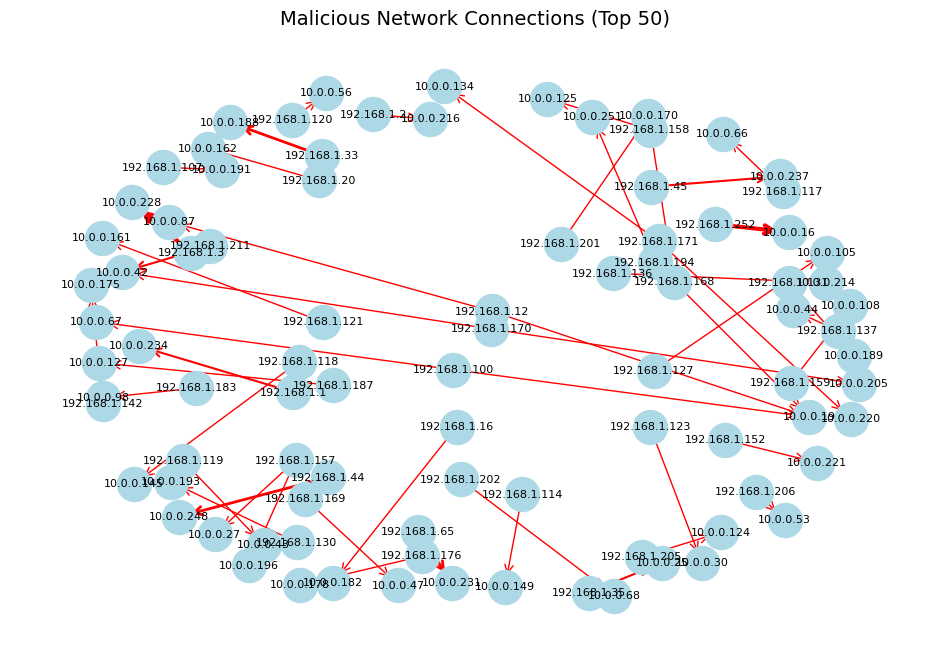

In [ ]:
# Create directed graph
G = nx.DiGraph()

# Add edges with weight = malicious event count
for _, row in mal_df.iterrows():
    G.add_edge(row["src"], row["dst"], weight=row["mal_events"])

# Draw
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # layout
edges = nx.draw_networkx_edges(
    G, pos, arrowstyle="->", arrowsize=15,
    edge_color="red", width=[d['weight']/2 for (_,_,d) in G.edges(data=True)]
)
nodes = nx.draw_networkx_nodes(G, pos, node_size=600, node_color="lightblue")
labels = nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Malicious Network Connections (Top 50)", fontsize=14)
plt.axis("off")
plt.show()
